<a href="https://colab.research.google.com/github/jiwoong2/deeplearning/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

## 구글 드라이브와 연동 (코랩 새로 켤 때마다 지워지기 땜에)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 구글 GPU 좀 써보자

In [25]:
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# print(DEVICE)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(DEVICE)

cpu


## train_DS와 test_DS 구경

In [ ]:
transform = transforms.ToTensor()
train_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=True, download=True, transform=transform)
test_DS = datasets.MNIST(root = '/content/drive/MyDrive/Colab Notebooks/data', train=False, download=True, transform=transform)

In [10]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: /content/drive/MyDrive/Colab Notebooks/data
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [11]:
train_DS.classes # . 뒤에서 탭 하면 이것저것 볼 수 있는 게 뜬다.

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [12]:
train_DS.class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [13]:
train_DS.data.shape

torch.Size([60000, 28, 28])

In [14]:
train_DS.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

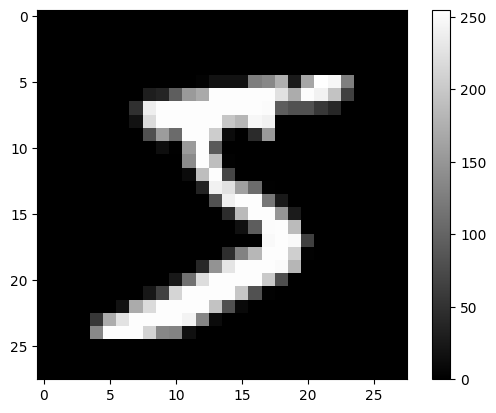

In [15]:
# plt.imshow(train_DS.data[0], cmap="gray")
# plt.colorbar()

plt.imshow(train_DS.data[0], cmap = "gray")
plt.colorbar()

In [16]:
print(train_DS.targets)
print(train_DS.targets.shape)

tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])


## DataLoader 구경

In [17]:
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [18]:
print(len(train_DL.dataset))

60000


<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.Size([32])
tensor(8)
torch.uint8
torch.float32
<class 'torch.Tensor'>
torch.Size([60000, 28, 28])
torch.uint8
<class 'torch.Tensor'>
torch.Size([32, 1, 28, 28])
torch.float32
tensor(0.)


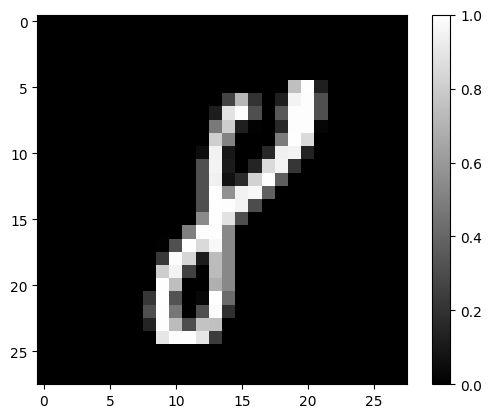

In [20]:
x_batch, y_batch = next(iter(train_DL)) # 데이터 한 국자
print(type(train_DS.data))
print(type(x_batch))
print(x_batch.shape)
print(y_batch.shape)
plt.imshow(x_batch[0].squeeze(), cmap="gray")
plt.colorbar()
print(y_batch[0])

print(train_DL.dataset.data.dtype)
print(x_batch.dtype)
# ToTensor 의 역할
# 1. tensor로 바꿔준다
# 2. 개채행열로 바꿔준다
# 3. 0~1 사이로 바꿔준다 (int -> float)



# 1. tensor 로 바꾸고
# 2. 개채행열로 바꾸고
# 3. 0~1 사이로 바꾸고 (int -> float)
print(type(train_DS.data))
print(train_DS.data.shape)
print(train_DS.data.dtype)
# print(train_DS.data[0][0][0][0])
x_batch, y_batch = next(iter(train_DL)) # next(iter(train_DS)) 는 한장만 꺼내기
print(type(x_batch))
print(x_batch.shape)
print(x_batch.dtype)
print(x_batch[0][0][0][0])

## 본격적으로 model 만들기!

In [21]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear = nn.Sequential(nn.Linear(28*28, 100),
                                    nn.ReLU(),
                                    nn.Linear(100,10))

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.linear(x)
        return x

In [24]:
# flatten 확인
x_batch, _ = next(iter(train_DL))
print(x_batch.shape)
flat_images = torch.flatten(x_batch)
print(flat_images.shape)
flat_images2 = torch.flatten(x_batch, start_dim=1) # 1번부터 flatten
print(flat_images2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [22]:
model = MLP()
print(model)
x_batch, _ = next(iter(train_DL))
print(model(x_batch).shape)

MLP(
  (linear): Sequential(
    (0): Linear(in_features=784, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)
torch.Size([32, 10])


## 모델 훈련시키기!

In [26]:
from torch import optim

LR = 1e-3
EPOCH = 5
criterion = nn.CrossEntropyLoss()

def Train(model, train_DL, criterion, optimizer):

    loss_history =[]
    NoT = len(train_DL.dataset)

    model.train() # train mode로 전환
    for ep in range(EPOCH):
        rloss = 0 # running loss
        for x_batch, y_batch in train_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # loss
            loss = criterion(y_hat, y_batch)
            # update
            optimizer.zero_grad() # gradient 누적을 막기 위한 초기화
            loss.backward() # backpropagation
            optimizer.step() # weight update
            # loss accumulation
            loss_b = loss.item() * x_batch.shape[0] # batch loss # BATCH_SIZE를 곱하면 마지막 18개도 32개를 곱하니까.. / 평균크로스엔트로피이므로
            rloss += loss_b # running loss
        # print loss
        loss_e = rloss/NoT
        loss_history += [loss_e]
        print(f"Epoch: {ep+1}, train loss: {round(loss_e,3)}")
        print("-"*20)

    return loss_history

## Cross Entropy 확인 (왜 모델에 softmax를 안붙였을까?)



In [ ]:
# cross entropy 구하는 여러가지 방법
import torch.nn.functional as F

y_hat = torch.randn(3, 5) # data는 세 개, 5 종류로 분류하는 문제 가정
print(y_hat) # 가로 축으로 합이 1이 아님, 즉, softmax 통과 전
y_batch = torch.randint(5, (3,))
print(y_batch)

# 방법 1
loss = F.cross_entropy(y_hat, y_batch) # softmax가 내장
print(loss)

# 방법 2
criterion = nn.CrossEntropyLoss() # softmax가 내장
print(criterion(y_hat, y_batch))

# 방법 3
y_hat_soft = F.softmax(y_hat, dim=1)
print(y_hat_soft)
loss = 0
for i, val in enumerate(y_hat_soft):
    print(i, val)
    loss += -torch.log(val[y_batch[i]])
print(loss/3) # 평균이 내장되어있음을 알 수 있다

tensor([[-1.5921,  0.0532, -0.8198,  0.8071, -2.2306],
        [ 1.8647, -0.4367,  0.3500, -0.3858, -0.6777],
        [ 0.7187, -0.3449, -1.8158,  1.0209,  0.8408]])
tensor([2, 2, 4])
tensor(1.7938)
tensor(1.7938)
tensor([[0.0503, 0.2606, 0.1088, 0.5538, 0.0266],
        [0.6649, 0.0666, 0.1462, 0.0700, 0.0523],
        [0.2559, 0.0884, 0.0203, 0.3462, 0.2892]])
0 tensor([0.0503, 0.2606, 0.1088, 0.5538, 0.0266])
1 tensor([0.6649, 0.0666, 0.1462, 0.0700, 0.0523])
2 tensor([0.2559, 0.0884, 0.0203, 0.3462, 0.2892])
tensor(1.7938)


2:15

## 모델 학습시키기

In [ ]:
# model = MLP().to(DEVICE) # x_batch, y_batch, model 까지 DEVICE에 올려줘야 함
# optimizer = optim.Adam(model.parameters(), lr=LR)
# loss_history = Train(model, train_DL, criterion, optimizer)

# plt.plot(range(1,EPOCH+1),loss_history)
# plt.xlabel('Epoch')
# plt.ylabel('loss')
# plt.title("Train Loss")
# plt.grid()

## 모델 저장하기 & 불러오기

In [ ]:
# save_model_path = "/content/drive/MyDrive/Colab Notebooks/results/MLP_MNIST.pt"
# torch.save(model.state_dict(), save_model_path)

In [ ]:
load_model = MLP().to(DEVICE)
load_model.load_state_dict(torch.load(save_model_path, map_location=DEVICE))
# map_location 있어야 GPU로 학습했던 거 현재 device로 불러올 수 있음

<All keys matched successfully>

## 모델 테스트하기

In [ ]:
def Test(model, test_DL):
    model.eval()
    with torch.no_grad():
        rcorrect = 0
        for x_batch, y_batch in test_DL:
            x_batch = x_batch.to(DEVICE)
            y_batch = y_batch.to(DEVICE)
            # inference
            y_hat = model(x_batch)
            # accuracy accumulation
            pred = y_hat.argmax(dim=1)
            corrects_b = torch.sum(pred == y_batch).item()
            rcorrect += corrects_b
        accuracy_e = rcorrect/len(test_DL.dataset)*100
    print(f"Test accuracy: {rcorrect}/{len(test_DL.dataset)} ({round(accuracy_e,1)} %)")

In [ ]:
Test(load_model, test_DL)

Test accuracy: 881/10000 (8.8 %)


In [ ]:
def Test_plot(model, test_DL):
    model.eval()
    with torch.no_grad():
        x_batch, y_batch = next(iter(test_DL))
        x_batch = x_batch.to(DEVICE)
        y_hat = model(x_batch)
        pred = y_hat.argmax(dim=1)

    x_batch = x_batch.to("cpu")

    plt.figure(figsize=(8,4))
    for idx in range(6):
        plt.subplot(2,3, idx+1, xticks=[], yticks=[])
        plt.imshow(x_batch[idx].permute(1,2,0).squeeze(), cmap="gray")
        pred_class = test_DL.dataset.classes[pred[idx]]
        true_class = test_DL.dataset.classes[y_batch[idx]]
        plt.title(f"{pred_class} ({true_class})", color = "g" if pred_class==true_class else "r")

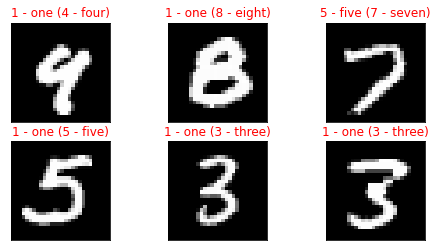

In [ ]:
Test_plot(load_model, test_DL)

In [ ]:
# 파라미터 수 구하기
def count_params(model):
    num = sum([p.numel() for p in model.parameters() if p.requires_grad])
    return num

In [ ]:
print(count_params(load_model))

79510
